## Lasso Regression

What is Lasso Regression?
LASSO stand for Least Absolute Shrinkage and Selection Operator. It is a type of linear regression that involves regularization, which helps prevent overfitting. 

Formula 

Cost function=∑(y i​ − y i^) 2+λ∑∣β j ∣

In [31]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [32]:
# Load dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [33]:
# Convert to dataframe 
df = pd.DataFrame(X, columns= diabetes.feature_names)
df['Progression'] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [34]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [35]:
#model
model = Lasso(alpha=1.0)

In [36]:
model.fit(X_train, y_train)

Lasso()

In [37]:
# Make prediction
y_pred = model.predict(X_test)

In [38]:
# Evaluate the model performance 
mse = mean_squared_error(y_test, y_pred)

In [39]:
mse

np.float64(4453.463835756329)

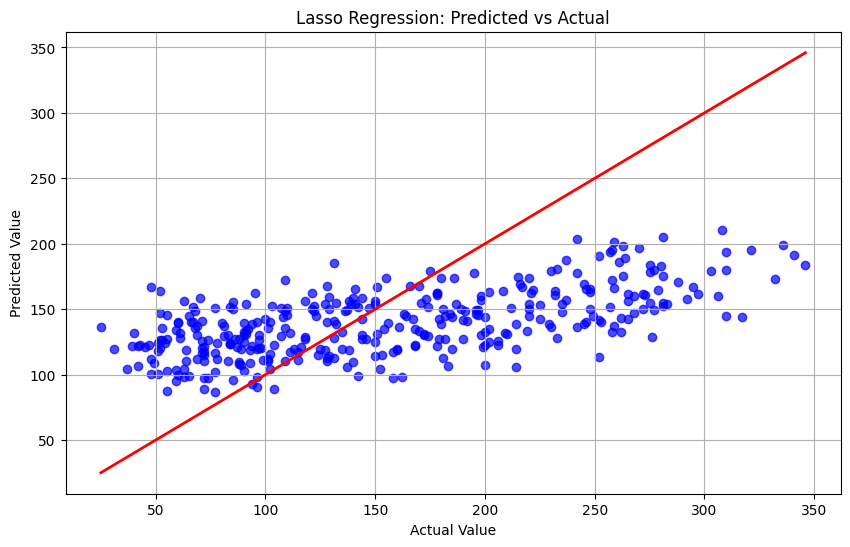

In [40]:
# Plot predicted and actual values 
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color = 'blue', alpha = 0.7)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color= 'red', lw=2 )
plt.title("Lasso Regression: Predicted vs Actual")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.grid(True)
plt.show()

In [41]:
# Experiment with different alpha
alpha_values =np.logspace(-4, 1, 100)
coefficients = []

for alpha in alpha_values:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coefficients.append(model.coef_)

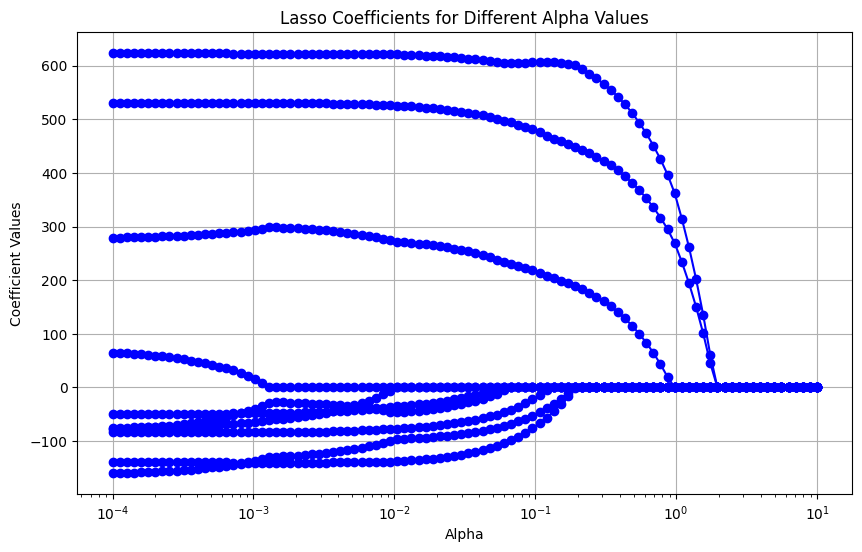

In [42]:
# Plot the coefficients for different alpha values
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, coefficients, marker='o', linestyle='-', color='b')
plt.title("Lasso Coefficients for Different Alpha Values")
plt.xlabel("Alpha")
plt.ylabel("Coefficient Values")
plt.xscale('log')  # Using a log scale for better visualization
plt.grid(True)
plt.show()
# how the coefficients of the model change. This shows how increasing alpha shrinks the coefficients toward zero.